# Scenario analysis for BMJ Open paper

Multiway sensitivity analyses to test the impact of varying parameters on the key performance measures (bed utilisation, lost slots, and total surgical throughput). 

## Scenarios

    for beds 30 : 80 (5):
        for schedule (baseline : baseline+weekend):

            baseline los ; baseline prop delay  

            baseline los ; 0.25* prop delay  

            0.25* los ; baseline prop delay  

            0.25* los ; 0.25* prop delay  

In [1]:
import simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import itertools
import plotly.express as px
import model2 as md
import kaleido
import plotly.io as pio

## Create schedule with weekend activity for scenarios

In [2]:
# DEFAULT_PRIMARY_DICT = {1: 'p_hip', 2: 'p_knee', 3: 'uni_knee'}
# DEFAULT_REVISION_DICT = {1: 'r_hip', 2: 'r_knee'}
# DEFAULT_PRIMARY_PROB = [0.51, 0.38, 0.11]
# DEFAULT_REVISION_PROB = [0.55, 0.45]

# SET_WEEKDAY = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
#                'Friday', 'Saturday', 'Sunday']
# SET_SESSIONS_PER_WEEKDAY = {'Monday': 3, 'Tuesday': 3, 'Wednesday': 3, 'Thursday': 3,
#                             'Friday': 3, 'Saturday': 3, 'Sunday': 3}
# SET_SESSIONS_PER_WEEKDAY_LIST = list(SET_SESSIONS_PER_WEEKDAY.values())
# SET_ALLOCATION = {'Monday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Tuesday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Wednesday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Thursday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Friday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Saturday': ['2P_or_1R', '2P_or_1R', '1P'],
#                   'Sunday': ['2P_or_1R', '2P_or_1R', '1P']}
# SET_THEATRES_PER_WEEKDAY = {'Monday': 4, 'Tuesday': 4, 'Wednesday': 4, 'Thursday': 4,
#                             'Friday': 4, 'Saturday': 4, 'Sunday': 4}

# DEFAULT_RESULTS_COLLECTION_PERIOD = 70
# DEFAULT_WARM_UP_PERIOD = 35
# DEFAULT_NUMBER_OF_RUNS = 50

# class Schedule:
        
#     """
#     Creates theatre schedule according to rules
#     """
#     def __init__(self, weekday=SET_WEEKDAY,
#                 allocation=SET_ALLOCATION,
#                 sessions_per_weekday=SET_SESSIONS_PER_WEEKDAY,
#                 sessions_per_weekday_list=SET_SESSIONS_PER_WEEKDAY_LIST,
#                 theatres_per_weekday=SET_THEATRES_PER_WEEKDAY):
#         """
#         parameters used to create schedule defined in 'scenarios class'
#         """
#         self.weekday=weekday
#         self.allocation=allocation
#         self.sessions_per_weekday=sessions_per_weekday
#         self.sessions_per_weekday_list=sessions_per_weekday_list
#         self.theatres_per_weekday=theatres_per_weekday
        
#     def create_schedule(self,weekday, sessions_per_weekday_list, allocation, theatres_per_weekday):
#         """
#         Arguments needed:
#             *weekday: a list of weekdays
#             *sessions_per_weekday: a list of integers representing the number of sessions per weekday
#             *allocation: a dictionary where the keys are the weekdays and the values are lists of 
#                         allocations for each session 
#             *theatres_per_weekday: a dictionary where the keys are the weekdays and the values are 
#                         integers representing the number of theatres per weekday 
#         Returns a dictionary where the keys are the weekdays and the values are lists 
#                         of lists of allocations for each theatre for each session.
#         """
#         schedule = {}
#         for day, num_sessions in zip(weekday, sessions_per_weekday_list):
#             schedule[day] = []
#             for theatre in range(theatres_per_weekday[day]):
#                 schedule[day].append([])
#                 for session in range(num_sessions):
#                     if allocation[day][session] == '1P':
#                         schedule[day][theatre].append({'primary': 1})
#                     elif allocation[day][session] == '1R':
#                         schedule[day][theatre].append({'revision': 1})
#                     elif allocation[day][session] == '2P':
#                         schedule[day][theatre].append({'primary': 2})
#                     elif allocation[day][session] == '2P_or_1R':
#                         if random.random() > 0.5:
#                             schedule[day][theatre].append({'primary': 2})
#                         else:
#                             schedule[day][theatre].append({'revision': 1})
#         return schedule
        
#     def daily_counts(self,day_data):
#         """
#         day_data: called in week_schedule() function, day_data is a sample weekly dictionary from create_schedule()
#         Convert dict to a pandas DataFrame with 'primary' and 'revision' as columns 
#         and days of the week as the index, populated with the total count of 'primary' and 'revision' in each day.
#         Returns a one week schedule
#         """
#         #day_data = create_schedule(weekday, sessions_per_weekday, allocation, theatres_per_weekday)
#         primary_slots = 0
#         revision_slots = 0
#         for value in day_data:
#             if value:
#                 for sub_value in value:
#                     if 'primary' in sub_value:
#                         primary_slots += sub_value['primary']
#                     if 'revision' in sub_value:
#                         revision_slots += sub_value['revision']
#         return [primary_slots, revision_slots]

#     def week_schedule(self):
#         """
#         samples a weekly dictionary of theatres, sessions, and surgeries from create_schedule()
#         counts daily number or primary and revision surgeries needed using daily_counts()
#         and converts to a dataframe
#         """
#         week_sched = pd.DataFrame(columns=['Primary_slots', 'Revision_slots'])
#         day_data = self.create_schedule(self.weekday, self.sessions_per_weekday_list,
#                                    self.allocation, self.theatres_per_weekday)
#         for key, value in day_data.items():
#             week_sched.loc[key] = self.daily_counts(value)
#         week_sched = week_sched.reset_index()
#         week_sched.rename(columns = {'index':'Day'}, inplace = True)
#         return week_sched

#     def theatre_capacity(self):
#         length_sched = int(round(2*(DEFAULT_WARM_UP_PERIOD+DEFAULT_RESULTS_COLLECTION_PERIOD)/7, 0))

#         DEFAULT_SCHEDULE_AVAIL = pd.DataFrame()
#         for week in range(length_sched):
#             single_random_week = self.week_schedule()
#             DEFAULT_SCHEDULE_AVAIL = pd.concat([DEFAULT_SCHEDULE_AVAIL, single_random_week],axis=0)
#         return DEFAULT_SCHEDULE_AVAIL.reset_index()

# class Save:
#     schedule = Schedule()
#     def __init__(self, schedule):
#         self.schedule = schedule
    
#     schedule_avail_weekend = schedule.theatre_capacity()
#     print(schedule_avail_weekend.head(7))
#     schedule_avail_weekend.to_csv('Test_data/schedule_seven_days.csv')

new_schedule = pd.read_csv("Test_data/schedule_seven_days.csv")

In [3]:
def get_scenario_dict():

    '''
    Creates a dictionary object of scenario attributes from a dataframe
    of defined scenarios
   
    Returns:
    --------
    dict:
    Contains the scenario attributes for the model
    df:
    Contains a table of scenarios
    '''
    
    #values for scenario df
    scenario = [i for i in range(1, 37)]
    beds_seq = [i for i in range(30, 75, 5)]*4
    primary_hip_mean_los = [md.DEFAULT_PRIMARY_HIP_MEAN_LOS, md.DEFAULT_PRIMARY_HIP_MEAN_LOS*0.25]*18
    primary_knee_mean_los = [md.DEFAULT_PRIMARY_KNEE_MEAN_LOS, md.DEFAULT_PRIMARY_KNEE_MEAN_LOS*0.25]*18
    revision_hip_mean_los = [md.DEFAULT_REVISION_HIP_MEAN_LOS, md.DEFAULT_REVISION_HIP_MEAN_LOS*0.25]*18
    revision_knee_mean_los = [md.DEFAULT_REVISION_KNEE_MEAN_LOS, md.DEFAULT_REVISION_KNEE_MEAN_LOS*0.25]*18    
    unicompart_knee_mean_los = [md.DEFAULT_UNICOMPART_KNEE_MEAN_LOS, md.DEFAULT_UNICOMPART_KNEE_MEAN_LOS*0.25]*18
    delay_post_los_mean = [md.DEFAULT_DELAY_POST_LOS_MEAN]*36
    prob_ward_delay = (([md.DEFAULT_PROB_WARD_DELAY, md.DEFAULT_PROB_WARD_DELAY*0.25]*9) + 
                       ([md.DEFAULT_PROB_WARD_DELAY*0.25, md.DEFAULT_PROB_WARD_DELAY]*9))

    #create df of scenarios
    values_df = pd.DataFrame({'scenario':scenario,
                          'n_beds': beds_seq,
                          'primary_hip_mean_los': primary_hip_mean_los,
                          'primary_knee_mean_los': primary_knee_mean_los,
                          'revision_hip_mean_los': revision_hip_mean_los,
                          'revision_knee_mean_los': revision_knee_mean_los,
                          'unicompart_knee_mean_los' : unicompart_knee_mean_los,
                          'delay_post_los_mean': delay_post_los_mean,
                          'prob_ward_delay': prob_ward_delay})
    
    #create dict of scenarios
    scenario_dict = {}
    for i, row in values_df.iterrows():
        key = row['scenario']
        value = [{'n_beds': row['n_beds']},
            {'primary_hip_mean_los': row['primary_hip_mean_los']},
            {'primary_knee_mean_los': row['primary_knee_mean_los']},
            {'revision_hip_mean_los': row['revision_hip_mean_los']},
            {'revision_knee_mean_los': row['revision_knee_mean_los']},
            {'unicompart_knee_mean_los' : row['unicompart_knee_mean_los']},
            {'delay_post_los_mean': row['delay_post_los_mean']},
            {'prob_ward_delay': row['prob_ward_delay']}]
        scenario_dict[key] = value
        
    return(values_df, scenario_dict)

In [5]:
def get_scenarios_2k(dict_s, new_schedule):

    """
    Create dictionary of scenario objects using attribute dictionary
    A set of baseline schedule
    A set of new_schedule
    
    Returns:
    --------
    dict
    Contains the scenarios for the model
  
    """
    #schedule = md.Schedule()
    scenarios = {}
    schedule = md.Schedule()
    
    for key, value in dict_s.items():
        attributes = {}
        for item in value:
            for sub_key, sub_value in item.items():
                attributes[sub_key] = sub_value
        #for each scenario, create a Scenario object with baseline schedule
        scenarios[key] = md.Scenario(schedule, schedule_avail=None, **attributes)
    
        # for each scenario, create a Scenario object with new schedule
        scenarios[f'{key}_new_schedule'] = md.Scenario(schedule, schedule_avail = new_schedule, **attributes)
   
    return scenarios


def run_scenario_analysis_2k(scenarios, rc_period, n_reps):
    '''
    Run each of the scenarios for a specified results
    collection period and replications.
    
    Returns:
    a) summary results table
    b) Results per day
    c) Patient-level results
       
    Params:
    ------
    scenarios: dict
        dictionary of Scenario objects
        
    rc_period: float
        model run length
        
    n_rep: int
        Number of replications
    
    '''
    print('Scenario Analysis')
    print(f'No. Scenario: {len(scenarios)}')
    print(f'Replications: {n_reps}')

    scenario_results_summ = {}
    scenario_results_day = {}
    scenario_results_ppat = {}
    scenario_results_rpat = {}
    
    for sc_name, scenario in scenarios.items():
        
        print(f'Running {sc_name}', end=' => ')
        
        replications = md.multiple_reps(scenario, 
                        results_collection=md.DEFAULT_RESULTS_COLLECTION_PERIOD+md.DEFAULT_WARM_UP_PERIOD, 
                        n_reps=md.DEFAULT_NUMBER_OF_RUNS)
        
        replications_summ = replications[0]
        replications_day = replications[1]
        replications_ppat = replications[2]
        replications_rpat = replications[3]
        
                    
        print('done.\n')
        
        #save the results
        scenario_results_summ[sc_name] = replications_summ
        scenario_results_day[sc_name] = replications_day
        scenario_results_ppat[sc_name] = replications_ppat
        scenario_results_rpat[sc_name] = replications_rpat
    
         
    print('Scenario analysis complete.')
    return (scenario_results_summ, scenario_results_day,scenario_results_ppat,scenario_results_rpat)

#get the scenario df and dict
sc = get_scenario_dict()
scenario_df, scenario_dict = sc[0], sc[1]

#convert to scenarios
#new_sched = pd.read_csv('schedule_weekends.csv')
scenarios = get_scenarios_2k(scenario_dict, new_schedule)

#run the scenario analysis
scenario_results_2k = run_scenario_analysis_2k(scenarios, 
                                         md.DEFAULT_RESULTS_COLLECTION_PERIOD+md.DEFAULT_WARM_UP_PERIOD,
                                         n_reps= md.DEFAULT_NUMBER_OF_RUNS)#number_of_runs

scenario_results_patients_2k = {key: pd.concat([scenario_results_2k[2][key], scenario_results_2k[3][key]], 
                              ignore_index=True) for key in scenario_results_2k[2].keys()}



Scenario Analysis
No. Scenario: 72
Replications: 50
Running 1.0 => done.

Running 1.0_new_schedule => done.

Running 2.0 => done.

Running 2.0_new_schedule => done.

Running 3.0 => done.

Running 3.0_new_schedule => done.

Running 4.0 => done.

Running 4.0_new_schedule => done.

Running 5.0 => done.

Running 5.0_new_schedule => done.

Running 6.0 => done.

Running 6.0_new_schedule => done.

Running 7.0 => done.

Running 7.0_new_schedule => done.

Running 8.0 => done.

Running 8.0_new_schedule => done.

Running 9.0 => done.

Running 9.0_new_schedule => done.

Running 10.0 => done.

Running 10.0_new_schedule => done.

Running 11.0 => done.

Running 11.0_new_schedule => done.

Running 12.0 => done.

Running 12.0_new_schedule => done.

Running 13.0 => done.

Running 13.0_new_schedule => done.

Running 14.0 => done.

Running 14.0_new_schedule => done.

Running 15.0 => done.

Running 15.0_new_schedule => done.

Running 16.0 => done.

Running 16.0_new_schedule => done.

Running 17.0 => done.


In [8]:
# save table of scenarios
scenario_df = scenario_df.round(2)
scenario_df.to_csv('output/scenario_df.csv')

# SAVE RESULTS

* Save scenario table (72 scenarios = range of capacity *9, los *2, delays *2, schedule *2)


## Scenario output description
Each capacity on the x-axis
With schedule and schedule_new in separate columns

Each los and delay scenario (4) for each capacity (and sched) with:
* mean  utilisation
* mean total thruput
* mean total lost slots

## Throughput

In [29]:
# scenario_results_patients_2k: patient-level results 

def mean_weekly_thruput_per_procedure(scenario_results_patients_2k):
    '''
    Takes patient level data as inputs
    Remove 'lost slots' so only patients with a stay are included
    Remove warm-up period
    Summarises by surgical type
    
    '''
    columns = []
    patient_summary = pd.DataFrame()

    for sc_name, replications in scenario_results_patients_2k.items():

        #for total throughput: select only those who are allocated a bed
        replications = replications[replications['lost slots'] == False]
        replications = replications[replications['Day'] > md.DEFAULT_WARM_UP_PERIOD]
        replications = replications[['Day','weekday','surgery type', 'depart']]

        patient_summary = pd.concat([patient_summary, replications.groupby(['Day','weekday'])\
                                         ['weekday'].count()],axis=1)

        #patient_summary_ci = pd.concat([patient_summary, replications.groupby(['Day','weekday','surgery type'])\
         #                                ['surgery type'].agg('mean','count','std')],axis=1)
        columns.append(sc_name)

    patient_summary.rename(columns = {'weekday':'Counts'}, inplace = True)
    #print(patient_summary_ci.head())

    # patient_summary.rename(columns = {'surgery type':'Counts'}, inplace = True)
    patient_summary = patient_summary.assign(Counts = lambda x: (x['Counts'] / md.DEFAULT_NUMBER_OF_RUNS)).fillna(0)
    patient_summary.columns = columns
    patient_summary = patient_summary.reset_index()
    patient_summary.rename(columns = {'level_0':'Day', 'level_1':'weekday'}, inplace = True)
    patient_summary = pd.DataFrame(patient_summary.groupby(['weekday'])[columns].mean())

    return patient_summary.reset_index() 

# run function and save weekly surgical throughput per procedure to csv
weekly_thru_procedure = mean_weekly_thruput_per_procedure(scenario_results_patients_2k)


In [10]:
# put in long format for plotting
def long_data(weekly_thru_procedure, measure):
    '''
    Take outputs of weekly and summarise per day into long format
    '''
    # create df of means and remove weekday
    means = weekly_thru_procedure.mean(axis = 0)
    means_thru = pd.DataFrame({'Means per day': means}).iloc[1:].reset_index()

    #separate schedule categories and number of beds into separate columns
    means_thru['index'] = means_thru['index'].astype(str)
    means_thru['Schedule '] = np.where(means_thru['index'].str.contains('_new_schedule'), 
                                       ' Baseline + weekends', ' Baseline')
    means_thru['Beds'] = [i for i in range(30, 75, 5) for _ in range(2)] * 4

    # extract scenario number
    means_thru['index_int'] = means_thru['index'].str.extract('(\d+)').astype(float)
    
    def get_new_value(idx):
        '''
        function to allocate scenario for los and prop delayed
        '''
        num = int(float(idx))
        if num % 2 == 0:
            los = 'low'
        else:
            los = 'high'
        if num <= 18:
            prop = 'prop_high' if num % 2 == 1 else 'prop_low'
        else:
            prop = 'prop_high' if num % 2 == 0 else 'prop_low'
        return f"{los}_los, {prop}"

    # Apply the function to the 'index' column to create a new column
    means_thru['scenarios'] = means_thru['index_int'].apply(get_new_value)

    # add a 'measure column' for plotting
    means_thru['Measure '] = [measure]*72
    
    return means_thru


In [30]:
long_thru_data = long_data(weekly_thru_procedure, ' Throughput')


## Utilisation

In [15]:
def daily_utilisation(scenario_results):
    """
    Weekly audit results for utilisation
    """
    columns = []
    weekly_summary = pd.DataFrame()

    for sc_name, replications in scenario_results.items():
            weekly_summary = pd.concat([weekly_summary, replications.groupby(['weekday']).apply(lambda x:x)],
                                axis=1)
            columns.append(sc_name)

    values = weekly_summary['bed_utilisation']
    values.columns = columns
    
    return values.reset_index()

# run function and save to csv
weekly_util = daily_utilisation(scenario_results_2k[1])


In [16]:
long_util_data = long_data(weekly_util, ' Utilisation')

,index,Means per day,Schedule,Beds,index_int,scenarios,Measure
0,1.0,0.904667,Baseline,30,1.0,"high_los, prop_high",Utilisation
1,1.0_new_schedule,0.944581,Baseline + weekends,30,1.0,"high_los, prop_high",Utilisation
2,2.0,0.368588,Baseline,35,2.0,"low_los, prop_low",Utilisation
3,2.0_new_schedule,0.498669,Baseline + weekends,35,2.0,"low_los, prop_low",Utilisation
4,3.0,0.895707,Baseline,40,3.0,"high_los, prop_high",Utilisation
5,3.0_new_schedule,0.941236,Baseline + weekends,40,3.0,"high_los, prop_high",Utilisation
6,4.0,0.284813,Baseline,45,4.0,"low_los, prop_low",Utilisation


## Lost slots

In [18]:

def patient_scenarios(scenario_results):
    """
    Takes patient level results for each performance measure by scenario
    Selects lost slots, summarise across runs, 
    """
    columns = []
    patient_summary = pd.DataFrame()

    for sc_name, replications in scenario_results.items():
        
        replications = replications[replications['Day'] > md.DEFAULT_WARM_UP_PERIOD]
        patient_summary = pd.concat([patient_summary, replications.groupby(['Day', 'weekday'])\
                                     ['lost slots'].sum().astype(int)],axis=1) 
        columns.append(sc_name) 
        
    patient_summary = patient_summary.apply(lambda x: x / md.DEFAULT_NUMBER_OF_RUNS)
    #columns = list(map('_'.join, zip(columns, patient_summary)))
    patient_summary.columns = columns
    patient_summary = patient_summary.reset_index()
    patient_summary.rename(columns = {'level_0':'Day', 'level_1':'weekday'}, inplace = True)
    
    return(patient_summary)

patient_summary = patient_scenarios(scenario_results_patients_2k)


In [22]:

def lost_slots(patient_summary):

    """
    Takes output of previous function
    Deals with 0-day arrivals
    plot lost slots per scenario per weekday
    
    """
    patient_summ = (patient_summary.set_index('Day')
        .reindex(range(patient_summary.Day.iat[0],patient_summary.Day.iat[-1]+1), fill_value=0)
        .reset_index())
    shortseq = np.arange(len(range(0,7)))
    length = math.ceil(len(patient_summ) / 7)
    # create total sequence and flatten array list into list of elements
    sequence = ([np.tile((shortseq),length)])
    flat_seq = list(itertools.chain(*sequence))
    # truncate to correct length and save to column
    sequence = flat_seq[:len(patient_summ)]
    patient_summ['weekday'] = sequence 
    patient_summ = patient_summ.fillna(0)
    
    #patient_summ = patient_summ[patient_summ["Day"] > DEFAULT_WARM_UP_PERIOD]    
    patient_summ = patient_summ.groupby('weekday').mean().reset_index()
    patient_summ = patient_summ.loc[:, patient_summ.columns != 'Day']
    #day_map = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    #patient_summ['weekday'] = patient_summ['weekday'].map(day_map)

    return(patient_summ)

lost_slots = lost_slots(patient_summary)

In [31]:
long_lostslots_data = long_data(lost_slots, ' Lost slots')

In [27]:
means_output = pd.concat([long_thru_data, long_util_data, long_lostslots_data])
means_output.to_csv('output/means_output.csv')

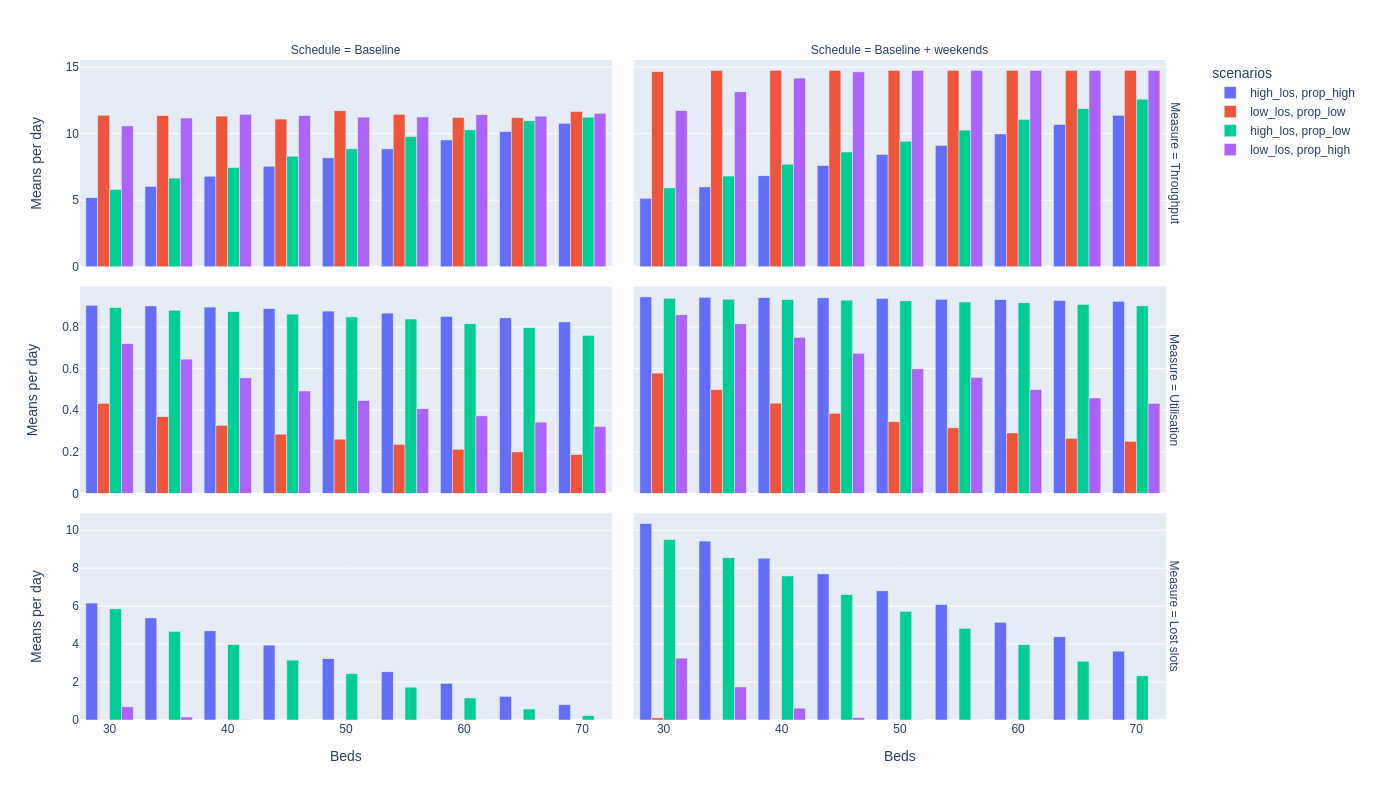

In [32]:
fig = px.bar(means_output, x=means_output.Beds, 
             y=means_output['Means per day'], color=means_output.scenarios, 
             facet_row=means_output['Measure '], facet_col=means_output['Schedule '], 
             barmode='group', width=1200, height=800)
fig.layout.yaxis.matches = 'y'
fig.layout.yaxis2.matches = 'y'

fig.layout.yaxis3.matches = 'y3'
fig.layout.yaxis4.matches = 'y3'

fig.layout.yaxis5.matches = 'y5'
fig.layout.yaxis6.matches = 'y5'

fig.show()

fig.write_image('output/scenarios_paper_fig.png')